# Explolatory data analysis for better understanding of the data

In [1]:
#Let's import some important packages and read the dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
data = pd.read_csv("C://Users/Remla/Desktop/dataset for ML/ethiopian_wfp_food_prices.csv")

In [2]:
data.head()#the first five rows of the dataset

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,9.024325,38.749226,cereals and tubers,Maize (white),100 KG,actual,Wholesale,ETB,120.75,14.8372
2,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,9.024325,38.749226,cereals and tubers,Sorghum (white),100 KG,actual,Wholesale,ETB,187.25,23.0083
3,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,9.024325,38.749226,cereals and tubers,Teff,100 KG,actual,Wholesale,ETB,222.0,27.2782
4,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,9.024325,38.749226,cereals and tubers,Wheat,100 KG,actual,Wholesale,ETB,168.75,20.7351


In [3]:
data=data.loc[data.index.difference([0]),data.columns.difference(['unit','currency'])]#removing some not important row and columns
data.head()

,admin1,admin2,category,commodity,date,latitude,longitude,market,price,priceflag,pricetype,usdprice
1,Addis Ababa,AA ZONE1,cereals and tubers,Maize (white),2000-01-15,9.024325,38.749226,Addis Ababa,120.75,actual,Wholesale,14.8372
2,Addis Ababa,AA ZONE1,cereals and tubers,Sorghum (white),2000-01-15,9.024325,38.749226,Addis Ababa,187.25,actual,Wholesale,23.0083
3,Addis Ababa,AA ZONE1,cereals and tubers,Teff,2000-01-15,9.024325,38.749226,Addis Ababa,222.0,actual,Wholesale,27.2782
4,Addis Ababa,AA ZONE1,cereals and tubers,Wheat,2000-01-15,9.024325,38.749226,Addis Ababa,168.75,actual,Wholesale,20.7351
5,Amhara,Administrative unit not available,cereals and tubers,Maize (white),2000-01-15,11.6,37.383333,Baher Dar,115.5,actual,Wholesale,14.1921


In [4]:
data.tail()# the last five rows

,admin1,admin2,category,commodity,date,latitude,longitude,market,price,priceflag,pricetype,usdprice
52224,Amhara,W. HAMRA,oil and fats,Oil (vegetable),2024-01-15,12.630556,39.034722,Sekota,0.0,forecast,Retail,0.0
52225,Amhara,W. HAMRA,pulses and nuts,Beans (fava),2024-01-15,12.630556,39.034722,Sekota,0.0,forecast,Retail,0.0
52226,Amhara,W. HAMRA,vegetables and fruits,Bananas,2024-01-15,12.630556,39.034722,Sekota,0.0,forecast,Retail,0.0
52227,Amhara,W. HAMRA,vegetables and fruits,Onions,2024-01-15,12.630556,39.034722,Sekota,0.0,forecast,Retail,0.0
52228,Amhara,W. HAMRA,vegetables and fruits,Tomatoes,2024-01-15,12.630556,39.034722,Sekota,0.0,forecast,Retail,0.0


In [5]:
data.shape


(52228, 12)

In [6]:
data['date']  = pd.to_datetime(data['date'])# changing the date from object to string format
data['date']

1       2000-01-15
2       2000-01-15
3       2000-01-15
4       2000-01-15
5       2000-01-15
           ...    
52224   2024-01-15
52225   2024-01-15
52226   2024-01-15
52227   2024-01-15
52228   2024-01-15
Name: date, Length: 52228, dtype: datetime64[ns]

In [7]:
data[data.isnull().any(axis=1)]# the missing values in the dataset at any row 

,admin1,admin2,category,commodity,date,latitude,longitude,market,price,priceflag,pricetype,usdprice
15549,NaN,NaN,cereals and tubers,Teff (Sergegna),2020-04-15,NaN,NaN,Bichena,3250.0,actual,Wholesale,98.1873
15550,NaN,NaN,cereals and tubers,Teff (white),2020-04-15,NaN,NaN,Bichena,3550.0,actual,Wholesale,107.2508
18385,NaN,NaN,cereals and tubers,Maize (white),2020-10-15,NaN,NaN,Bichena,1290.0,actual,Wholesale,35.0068
18386,NaN,NaN,cereals and tubers,Teff (Sergegna),2020-10-15,NaN,NaN,Bichena,3665.0,actual,Wholesale,99.4573
18387,NaN,NaN,cereals and tubers,Teff (white),2020-10-15,NaN,NaN,Bichena,4035.0,actual,Wholesale,109.498


In [8]:
data.admin1 = data.admin1.fillna('Misrak Gojam')# now filling the null values data from internet 
data.admin1
data.admin2 = data.admin2.fillna('Enemay woreda')
data.admin2
data.latitude = data.latitude.fillna(10.27)
data.latitude
data.longitude = data.longitude.fillna(38.12)
data.longitude

1        38.749226
2        38.749226
3        38.749226
4        38.749226
5        37.383333
           ...    
52224    39.034722
52225    39.034722
52226    39.034722
52227    39.034722
52228    39.034722
Name: longitude, Length: 52228, dtype: object

In [10]:
data.isnull().sum()#to check how many null values after filling the empty space


admin1       0
admin2       0
category     0
commodity    0
date         0
latitude     0
longitude    0
market       0
price        0
priceflag    0
pricetype    0
usdprice     0
dtype: int64

In [11]:
data.dtypes# data types


admin1               object
admin2               object
category             object
commodity            object
date         datetime64[ns]
latitude             object
longitude            object
market               object
price                object
priceflag            object
pricetype            object
usdprice             object
dtype: object

In [12]:
data['price'] = data.price.astype(float)#to change the price value from object to float
data['usdprice']=data.usdprice.astype(float)
data['latitude']=data.latitude.astype(float)
data['longitude']=data.longitude.astype(float)
data.dtypes

admin1               object
admin2               object
category             object
commodity            object
date         datetime64[ns]
latitude            float64
longitude           float64
market               object
price               float64
priceflag            object
pricetype            object
usdprice            float64
dtype: object

In [13]:
print("checking Redundancy in each column")
column ={'price':data['price'].duplicated().sum(),
         'pricetype':data['pricetype'].duplicated().sum(),
         'priceflag':data['priceflag'].duplicated().sum(),
         'commodity':data['commodity'].duplicated().sum(),
         'category':data['category'].duplicated().sum(),
         'market':data['market'].duplicated().sum(),
         'date':data['date'].duplicated().sum(),
         'admin2':data['admin2'].duplicated().sum(),
         'admin1':data['admin1'].duplicated().sum(),
         'usdprice':data['usdprice'].duplicated().sum(),
         'latitude':data['latitude'].duplicated().sum(),
         'longitude':data['longitude'].duplicated().sum()}
for col, c_val in column.items():
         print('The amount of redundent value in  '+ col +'-> ' + str(c_val) )
        

checking Redundancy in each column
The amount of redundent value in  price-> 45648
The amount of redundent value in  pricetype-> 52226
The amount of redundent value in  priceflag-> 52224
The amount of redundent value in  commodity-> 52135
The amount of redundent value in  category-> 52220
The amount of redundent value in  market-> 52109
The amount of redundent value in  date-> 51940
The amount of redundent value in  admin2-> 52168
The amount of redundent value in  admin1-> 52216
The amount of redundent value in  usdprice-> 30950
The amount of redundent value in  latitude-> 52111
The amount of redundent value in  longitude-> 52113


In [14]:
# we have seen how much all columns have redundent values, now all redundent values removed 
print("these are number of values in each column after removing the redundent values")
print("commodity: " + str(data['commodity'].drop_duplicates().shape))
print("price: "+ str(data['price'].drop_duplicates().shape))
print("usdprice: "+ str(data['usdprice'].drop_duplicates().shape))
print("pricetype :" + str(data['pricetype'].drop_duplicates().shape))
print("priceflag:" + str(data['priceflag'].drop_duplicates().shape))
print("latitude :"+ str(data['latitude'].drop_duplicates().shape))
print("longitude :" + str(data['longitude'].drop_duplicates().shape))
print("market :" + str(data['market'].drop_duplicates().shape))
print("admin1 :"+ str(data['admin1'].drop_duplicates().shape))
print("admin2 :"+ str(data['admin2'].drop_duplicates().shape))
print("category :" + str(data['category'].drop_duplicates().shape))
print("date :" + str(data['date'].drop_duplicates().shape))

these are number of values in each column after removing the redundent values
commodity: (93,)
price: (6580,)
usdprice: (21278,)
pricetype :(2,)
priceflag:(4,)
latitude :(117,)
longitude :(115,)
market :(119,)
admin1 :(12,)
admin2 :(60,)
category :(8,)
date :(288,)


In [15]:
data.columns# list the name of columns

Index(['admin1', 'admin2', 'category', 'commodity', 'date', 'latitude',
       'longitude', 'market', 'price', 'priceflag', 'pricetype', 'usdprice'],
      dtype='object')

In [16]:
data[['category','priceflag','price']]# slicing multiple column from whole dataset
  
data.values# array or matrix form in general numpy representation

array([['Addis Ababa', 'AA ZONE1', 'cereals and tubers', ..., 'actual',
        'Wholesale', 14.8372],
       ['Addis Ababa', 'AA ZONE1', 'cereals and tubers', ..., 'actual',
        'Wholesale', 23.0083],
       ['Addis Ababa', 'AA ZONE1', 'cereals and tubers', ..., 'actual',
        'Wholesale', 27.2782],
       ...,
       ['Amhara', 'W. HAMRA', 'vegetables and fruits', ..., 'forecast',
        'Retail', 0.0],
       ['Amhara', 'W. HAMRA', 'vegetables and fruits', ..., 'forecast',
        'Retail', 0.0],
       ['Amhara', 'W. HAMRA', 'vegetables and fruits', ..., 'forecast',
        'Retail', 0.0]], dtype=object)

# Summary statistics

In [17]:
data.min()

admin1               Addis Ababa
admin2                  AA ZONE1
category      cereals and tubers
commodity               Avocados
date         2000-01-15 00:00:00
latitude                3.534996
longitude              33.953408
market                    Abaala
price                        0.0
priceflag                 actual
pricetype                 Retail
usdprice                     0.0
dtype: object

In [18]:
data.max()

admin1                      Tigray
admin2                       ZONE5
category     vegetables and fruits
commodity              Wheat flour
date           2024-01-15 00:00:00
latitude                  14.45405
longitude                44.279701
market                       Ziway
price                      79000.0
priceflag                 forecast
pricetype                Wholesale
usdprice                 1495.0795
dtype: object

In [19]:
data['price'].count()

52228

In [20]:
print(data['pricetype'].value_counts(dropna=False))

Retail       41882
Wholesale    10346
Name: pricetype, dtype: int64


In [21]:
print(data['admin1'].value_counts(dropna=False))#  it counts as it is"

Oromia          16343
Amhara          11141
Somali           6998
Tigray           5021
SNNPR            3979
Dire Dawa        2253
Addis Ababa      2220
Gambela          1506
Harari           1110
Afar             1087
B. Gumuz          565
Misrak Gojam        5
Name: admin1, dtype: int64


In [23]:
data.sum(axis = 1)

C:\Users\Remla\AppData\Local\Temp/ipykernel_2776/4227235248.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.sum(axis = 1)


1        183.360751
2        258.031851
3        297.051751
4        237.258651
5        178.675433
            ...    
52224     51.665278
52225     51.665278
52226     51.665278
52227     51.665278
52228     51.665278
Length: 52228, dtype: float64

In [24]:
print(data['price'].sum())

92004066.2


In [25]:
data.sort_values('price')# sorting / ordering by price

,admin1,admin2,category,commodity,date,latitude,longitude,market,price,priceflag,pricetype,usdprice
52228,Amhara,W. HAMRA,vegetables and fruits,Tomatoes,2024-01-15,12.630556,39.034722,Sekota,0.0,forecast,Retail,0.0000
44410,Gambela,GODERE,"meat, fish and eggs",Livestock (Sheep),2022-08-15,7.233333,35.316667,Meti,0.0,forecast,Retail,0.0000
44409,Gambela,GODERE,cereals and tubers,Sorghum (white),2022-08-15,7.233333,35.316667,Meti,0.0,forecast,Retail,0.0000
44408,Gambela,GODERE,cereals and tubers,Maize (white),2022-08-15,7.233333,35.316667,Meti,0.0,forecast,Retail,0.0000
44407,Dire Dawa,DIRE DAWA,pulses and nuts,"Peas (split, dry)",2022-08-15,9.593056,41.866111,Diredawa,0.0,forecast,Retail,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
32712,Somali,LIBEN,"meat, fish and eggs",Livestock (camel),2022-10-15,5.112714,40.654339,Filtu,69500.0,actual,Retail,1318.0641
37012,Somali,JIJIGA,"meat, fish and eggs",Livestock (camel),2023-05-15,9.333300,42.816670,Jijiga,70000.0,actual,Retail,1292.3758
32697,Somali,LIBEN,"meat, fish and eggs",Livestock (camel),2022-10-15,4.416665,41.416665,Dolo Ado,72000.0,actual,Retail,1365.4764
35999,Tigray,NW. TIGRAY,"meat, fish and eggs",Livestock (ox),2023-03-15,14.100000,38.283332,Shire,72500.0,actual,Retail,1351.3513


In [26]:
data.describe()

,latitude,longitude,price,usdprice
count,52228.000000,52228.000000,52228.000000,52228.000000
mean,9.355737,39.720935,1761.585092,42.311195
std,2.481022,1.993778,3953.123194,81.933369
min,3.534996,33.953408,0.000000,0.000000
25%,7.666667,38.466667,2.400000,0.180775
50%,9.225556,39.633300,203.875000,8.951600
75%,11.133333,41.416670,2235.500000,56.603800
max,14.454050,44.279701,79000.000000,1495.079500


In [27]:
data.cov()#calculating the covariance\n"

,latitude,longitude,price,usdprice
latitude,6.155469,-0.579623,-3.837919e+01,-0.368248
longitude,-0.579623,3.975151,3.681252e+02,5.102115
price,-38.379186,368.125241,1.562718e+07,317138.111407
usdprice,-0.368248,5.102115,3.171381e+05,6713.076968


In [28]:

data["price"].corr(data["usdprice"])# the correlation between latitude and longitude"

0.9791455927887034

In [29]:
data[data.commodity=="Teff"].price.mean()# the mean value of teff price to see as an example

1099.436328928047

# aggregation or computing summary statistic for each group

In [30]:
data[['commodity','category']].agg(['min','max'])

,commodity,category
min,Avocados,cereals and tubers
max,Wheat flour,vegetables and fruits


In [31]:
data.sort_values('commodity').head(10)# sorting the commodity and displaying the first ten rows

,admin1,admin2,category,commodity,date,latitude,longitude,market,price,priceflag,pricetype,usdprice
36598,Amhara,S. GONDER,vegetables and fruits,Avocados,2023-05-15,11.733333,38.466665,Nefas Mewcha,70.0,actual,Retail,1.2924
18585,Amhara,S. WELLO,vegetables and fruits,Avocados,2020-10-15,11.229990,39.063251,Masha,35.0,actual,Retail,0.9498
18568,Amhara,S. WELLO,vegetables and fruits,Avocados,2020-10-15,10.922545,39.784135,Harbu,35.0,actual,Retail,0.9498
20504,Amhara,S. WELLO,vegetables and fruits,Avocados,2021-01-15,10.922545,39.784135,Harbu,40.0,actual,Retail,1.0204
32280,Amhara,S. GONDER,vegetables and fruits,Avocados,2022-10-15,11.733333,38.466665,Nefas Mewcha,65.0,actual,Retail,1.2327
17965,Amhara,S. WELLO,vegetables and fruits,Avocados,2020-09-15,11.229990,39.063251,Masha,35.0,actual,Retail,0.9607
19233,Amhara,S. WELLO,vegetables and fruits,Avocados,2020-11-15,10.922545,39.784135,Harbu,30.0,actual,Retail,0.7937
18600,Amhara,S. WELLO,vegetables and fruits,Avocados,2020-10-15,11.102048,39.627170,Segno Gebeya,25.0,actual,Retail,0.6784
27383,Amhara,N. WELLO,vegetables and fruits,Avocados,2022-03-15,11.666251,39.657650,Mersa,35.0,actual,Retail,0.6890
16467,Amhara,N. WELLO,vegetables and fruits,Avocados,2020-06-15,12.150000,39.633333,Kobo,40.0,actual,Retail,1.1662


In [32]:
data.groupby('priceflag')[['price']].min() #using the minimum price it is grouping the price flag

,price
priceflag,
actual,0.88
"actual,aggregate",25.50
aggregate,5.27
forecast,0.00


In [33]:
data_subset = data[data['category'] =='non-food']# this is filtering or subsetting the \n",
                                                 #data based on boolean less, greater equal , not equal, greater or equal\n",
data_subset.head()
  

,admin1,admin2,category,commodity,date,latitude,longitude,market,price,priceflag,pricetype,usdprice
8796,Addis Ababa,AA ZONE1,non-food,Exchange rate,2014-04-15,9.024325,38.749226,Addis Ababa,19.36,actual,Retail,1.0053
8797,Addis Ababa,AA ZONE1,non-food,Fuel (diesel),2014-04-15,9.024325,38.749226,Addis Ababa,18.55,actual,Retail,0.9633
8798,Addis Ababa,AA ZONE1,non-food,Fuel (kerosene),2014-04-15,9.024325,38.749226,Addis Ababa,15.75,actual,Retail,0.8179
8799,Addis Ababa,AA ZONE1,non-food,Fuel (petrol-gasoline),2014-04-15,9.024325,38.749226,Addis Ababa,20.47,actual,Retail,1.0630
8941,Addis Ababa,AA ZONE1,non-food,Exchange rate,2014-05-15,9.024325,38.749226,Addis Ababa,19.43,actual,Retail,1.0048


In [34]:
#what about if we select rows with its specific labels we use the method loc 
data.iloc[3:6,2:5]

,category,commodity,date
4,cereals and tubers,Wheat,2000-01-15
5,cereals and tubers,Maize (white),2000-01-15
6,cereals and tubers,Maize (white),2000-01-15


In [35]:
data.loc[10:20,['date','market','category']]

,date,market,category
10,2000-02-15,Addis Ababa,cereals and tubers
11,2000-02-15,Addis Ababa,cereals and tubers
12,2000-02-15,Baher Dar,cereals and tubers
13,2000-02-15,Diredawa,cereals and tubers
14,2000-02-15,Mekele,cereals and tubers
15,2000-03-15,Addis Ababa,cereals and tubers
16,2000-03-15,Addis Ababa,cereals and tubers
17,2000-03-15,Addis Ababa,cereals and tubers
18,2000-03-15,Addis Ababa,cereals and tubers
19,2000-03-15,Baher Dar,cereals and tubers


In [36]:
data.loc[50:55,['date','commodity','price','admin1']]# to see the distribution as an example"

,date,commodity,price,admin1
50,2000-08-15,Maize (white),125.75,Addis Ababa
51,2000-08-15,Sorghum (white),216.25,Addis Ababa
52,2000-08-15,Teff,249.75,Addis Ababa
53,2000-08-15,Wheat,205.00,Addis Ababa
54,2000-08-15,Maize (white),106.25,Amhara
55,2000-08-15,Maize (white),147.25,Dire Dawa


In [37]:
data.iloc[10:20,[0,3,6]]# the same to loc but it uses index location or position here we use the column names index"


,admin1,commodity,longitude
11,Addis Ababa,Wheat,38.749226
12,Amhara,Maize (white),37.383333
13,Dire Dawa,Maize (white),41.866111
14,Tigray,Maize (white),39.475278
15,Addis Ababa,Maize (white),38.749226
16,Addis Ababa,Sorghum (white),38.749226
17,Addis Ababa,Teff,38.749226
18,Addis Ababa,Wheat,38.749226
19,Amhara,Maize (white),37.383333
20,Dire Dawa,Maize (white),41.866111


In [38]:
data.iloc[:,0:3]# all rows and first three columns"

,admin1,admin2,category
1,Addis Ababa,AA ZONE1,cereals and tubers
2,Addis Ababa,AA ZONE1,cereals and tubers
3,Addis Ababa,AA ZONE1,cereals and tubers
4,Addis Ababa,AA ZONE1,cereals and tubers
5,Amhara,Administrative unit not available,cereals and tubers
...,...,...,...
52224,Amhara,W. HAMRA,oil and fats
52225,Amhara,W. HAMRA,pulses and nuts
52226,Amhara,W. HAMRA,vegetables and fruits
52227,Amhara,W. HAMRA,vegetables and fruits


In [39]:
data.iloc[1:3,:]# 1st row or index one's row up to index 3 doesn't include index 3"

,admin1,admin2,category,commodity,date,latitude,longitude,market,price,priceflag,pricetype,usdprice
2,Addis Ababa,AA ZONE1,cereals and tubers,Sorghum (white),2000-01-15,9.024325,38.749226,Addis Ababa,187.25,actual,Wholesale,23.0083
3,Addis Ababa,AA ZONE1,cereals and tubers,Teff,2000-01-15,9.024325,38.749226,Addis Ababa,222.00,actual,Wholesale,27.2782


In [39]:
data.commodity.unique()# array format of the total record of commodity with out redundency

array(['Maize (white)', 'Sorghum (white)', 'Teff', 'Wheat',
       'Sorghum (red)', 'Sorghum', 'Pasta', 'Rice (imported)', 'Lentils',
       'Beans (fava, dry)', 'Peas (green, dry)', 'Milk', 'Sugar',
       'Chickpeas', 'Exchange rate', 'Fuel (diesel)', 'Fuel (kerosene)',
       'Fuel (petrol-gasoline)', 'Wheat flour', 'Barley',
       'Sweet potatoes', 'Beans (haricot)', 'Livestock (Goat)',
       'Livestock (Sheep)', 'Wage (non-qualified labour)',
       'Corn Soy Blend (CSB++, food aid)', 'Exchange rate (unofficial)',
       'Pasta (macaroni)', 'Rice', 'Teff (white)', 'Wheat (white)',
       'Livestock (camel)', 'Livestock (cattle)', 'Oil (palm)', 'Garlic',
       'Onions', 'Tomatoes', 'Potatoes', 'Milk (camel)',
       'Wage (casual labour)', 'Butter (cow milk)', 'Butter (goat milk)',
       'Teff (red)', 'Livestock (donkey)', 'Oil (vegetable)',
       'Teff (mixed)', 'Wheat (mixed)', 'Beans (fava)', 'Peas',
       'Maize (yellow)', 'Livestock (ox)', 'Bananas', 'Cabbage',
       'C

In [40]:
#grouping the price type and commodity\n",
comm_pricetype=pd.DataFrame(data.groupby(['pricetype','commodity']).sum()['price'])
comm_pricetype.sort_values(['pricetype','price'],ascending=False)
  

price
pricetype commodity                              
Wholesale Teff (Sergegna)              1498662.75
          Maize (white)                1481963.80
          Teff (white)                 1464195.83
          Wheat                        1403339.04
          Teff (red)                   1064864.88
...                                           ...
Retail    Pasta (macaroni)                 118.00
          Wage (non-qualified labour)       70.00
          Taro                              29.00
          Kocho                             20.00
          Potatoes (Irish)                  10.00

[108 rows x 1 columns]

In [41]:
#the first 10 expensive commodity prices in decreasing order
commodity_price=pd.DataFrame(data.groupby('commodity').sum()['price'])
comm_price=commodity_price.sort_values('price',ascending=False)
comm_price[:10]

,price
commodity,
Maize (white),7500034.63
Livestock (camel),6866473.00
Livestock (bull),6776585.00
Livestock (cattle),6283952.49
Lentils,5157866.25
Livestock (ox),5010022.71
Livestock (Goat),4880581.32
Beans (fava),4809582.40
Livestock (Sheep),4331967.05


In [42]:
#getting month year from dataset, leaving the days\n",
data['month-year'] = data['date'].apply(lambda x: x.strftime('%Y-%m'))
#grouping month year
data_trend=data.groupby('month-year').sum()['price'].reset_index()
data_trend

,month-year,price
0,2000-01,1123.75
1,2000-02,1170.00
2,2000-03,1177.25
3,2000-04,1230.00
4,2000-05,1209.25
...,...,...
283,2023-09,0.00
284,2023-10,0.00
285,2023-11,0.00
286,2023-12,0.00


In [43]:
pd.DataFrame(data.category.value_counts())# each categories quantity"

pd.DataFrame(data.priceflag.value_counts())

pd.DataFrame(data.priceflag.value_counts(normalize=True))# to make the proportion easily"

bycategory = data.groupby('category').priceflag.value_counts(normalize=True)
bycategory

bycategory.unstack()# now we can get  the well structured record than the previous "

priceflag,actual,"actual,aggregate",aggregate,forecast
category,,,,
cereals and tubers,0.764599,0.003208,0.028370,0.203823
"meat, fish and eggs",0.630754,0.006576,0.026165,0.336505
milk and dairy,0.642355,NaN,NaN,0.357645
miscellaneous food,0.610489,NaN,0.047142,0.342369
non-food,0.659007,0.022518,0.050092,0.268382
oil and fats,0.595499,0.015815,0.080292,0.308394
pulses and nuts,0.685729,0.005366,0.005534,0.303371
vegetables and fruits,0.728451,0.013665,0.059566,0.198318


In [44]:
df = pd.DataFrame(data,columns=['commodity','category','priceflag']).head()#creating dataframe for the first five commodity, category and priceflag values\n",
df

,commodity,category,priceflag
1,Maize (white),cereals and tubers,actual
2,Sorghum (white),cereals and tubers,actual
3,Teff,cereals and tubers,actual
4,Wheat,cereals and tubers,actual
5,Maize (white),cereals and tubers,actual


In [45]:
data['priceGroup'] = pd.cut(data.price,[1,600,1300,2000,2800,9000], labels=['1-600','600-1300','1300-2000','2000-2800','2800-9000'])
data['priceGroup'].head()# creating the group for price data , here we use maximum price as 9000"

1    1-600
2    1-600
3    1-600
4    1-600
5    1-600
Name: priceGroup, dtype: category
Categories (5, object): ['1-600' < '600-1300' < '1300-2000' < '2000-2800' < '2800-9000']

# Distribution

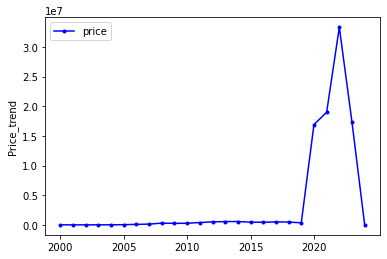

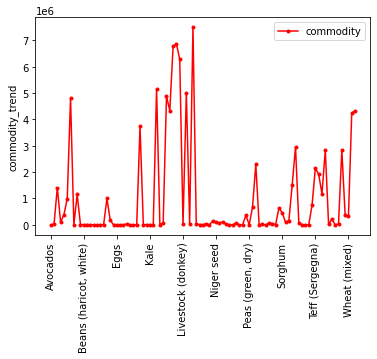

In [46]:
#getting month year from dataset\n",
#data['year'] = data['date'].apply(lambda x: x.strftime('%Y'))
data['year'] = data['date'].apply(lambda x: x.strftime('%Y'))

#grouping by year
data_trend=data.groupby('year').sum()['price'].reset_index()
plt.plot(data_trend.year,data_trend.price,'b.-',label="price")
plt.ylabel('Price_trend')
data_trend.year[::5]
plt.xticks(data_trend.year[: :5])
plt.legend()
plt.show()
#print(data_trend) of commodity and price on the first picture since the price data given at the last rows almost 0.0 

comm_price=data.groupby('commodity').sum()['price'].reset_index()
plt.plot(comm_price.commodity,comm_price.price,'r.-',label="commodity")
plt.ylabel('commodity_trend')
plt.xticks(comm_price.commodity[: :10])
comm_price.commodity[::10]
plt.xticks(rotation='vertical',size=10)
plt.legend()
plt.show()

1       2000-01-15
10001   2014-12-15
20001   2020-12-15
30001   2022-07-15
40001   2020-05-15
50001   2023-08-15
Name: date, dtype: datetime64[ns]


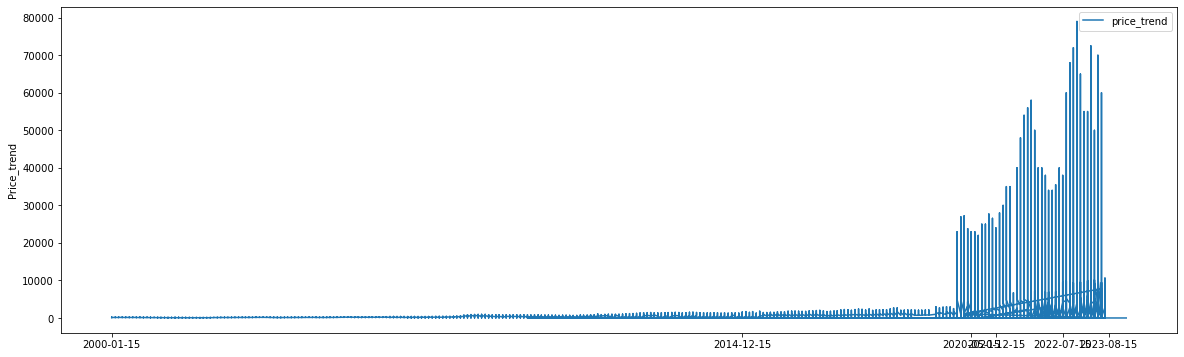

In [47]:
print(data.date[::10000])# subsetting the set by ten thausand

plt.figure(figsize=(20,6))
plt.plot(data.date,data.price,label="price_trend")# such a bulk data elements
plt.xticks(data.date[::10000])#even using this large subset
plt.ylabel('Price_trend')
plt.legend()
plt.show()

C:\Users\Remla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'category')

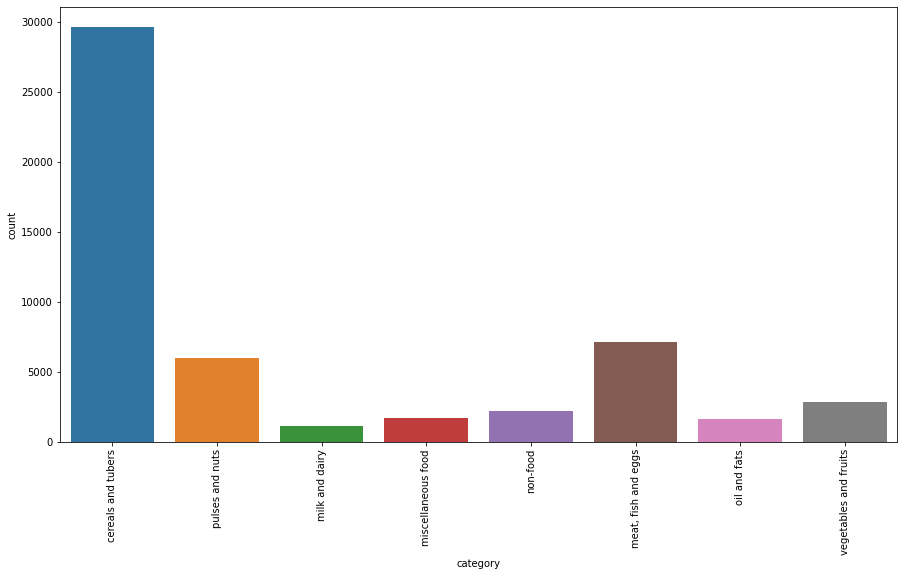

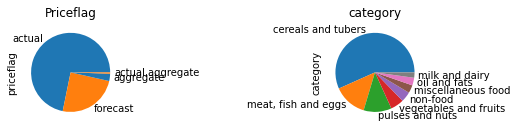

In [48]:
# the most prefered category using distribution using bar and pie chart\n",
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical',size=10)
sns.countplot(data['category'])

# now lets visualise  the groups of the distribution"

plt.figure(figsize=(10,4))
plt.subplot(1,2,1);data.priceflag.value_counts().plot(kind='bar',color=['C0','C1'])
plt.title('Priceflag')
plt.subplot(1,2,2);data.category.value_counts().plot(kind='bar',color=['C2','C3'])
plt.title('category')

plt.subplot(2,2,1);data.priceflag.value_counts().plot(kind='pie',colors=['C0','C1']);
plt.title('Priceflag')
plt.subplot(2,2,2);data.category.value_counts().plot(kind='pie',colors=['C0','C1','C2','C3','C4','C5','C6','C7']);
plt.title('category')

In [53]:
byprice = data.groupby(['priceGroup','category']).priceflag.value_counts(normalize=True)

byprice.unstack().drop("aggregate",axis = 1)

byprice.unstack().drop("aggregate",axis = 1).unstack()# to clean it much more and plot it again



priceflag              actual                                     \
category   cereals and tubers meat, fish and eggs milk and dairy   
priceGroup                                                         
1-600                0.960239            1.000000            1.0   
600-1300             0.985851            0.982935            NaN   
1300-2000            0.984647            0.964806            NaN   
2000-2800            0.938471            0.924915            NaN   
2800-9000            0.936549            0.907915            NaN   

priceflag                                                            \
category   miscellaneous food non-food oil and fats pulses and nuts   
priceGroup                                                            
1-600                0.922705  0.89981     0.860915        1.000000   
600-1300             1.000000  1.00000          NaN        1.000000   
1300-2000                 NaN      NaN          NaN        1.000000   
2000-2800            1.000000  1.00000          NaN        1.000000   
2800-9000            1.000000  1.00000          NaN        0.976068   

priceflag                          actual,aggregate                      \
category   vegetables and fruits cereals and tubers meat, fish and eggs   
priceGroup                                                                
1-600                   0.908494           0.001561                 NaN   
600-1300                     NaN           0.004042                 NaN   
1300-2000                    NaN           0.006653            0.007282   
2000-2800               1.000000           0.010566            0.007964   
2800-9000               1.000000           0.006405            0.025875   

priceflag                                                            \
category   milk and dairy miscellaneous food  non-food oil and fats   
priceGroup                                                            
1-600                 NaN                NaN  0.031072     0.022887   
600-1300              NaN                NaN       NaN          NaN   
1300-2000             NaN                NaN       NaN          NaN   
2000-2800             NaN                NaN       NaN          NaN   
2800-9000             NaN                NaN       NaN          NaN   

priceflag                                         
category   pulses and nuts vegetables and fruits  
priceGroup                                        
1-600                  NaN              0.017075  
600-1300               NaN                   NaN  
1300-2000              NaN                   NaN  
2000-2800              NaN                   NaN  
2800-9000         0.011782                   NaN

<Figure size 1440x576 with 0 Axes>

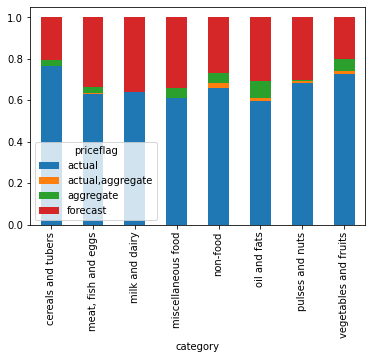

<Figure size 1440x576 with 0 Axes>

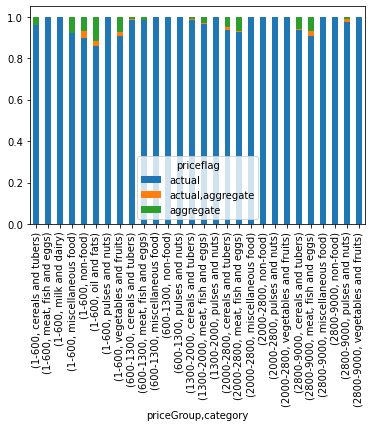

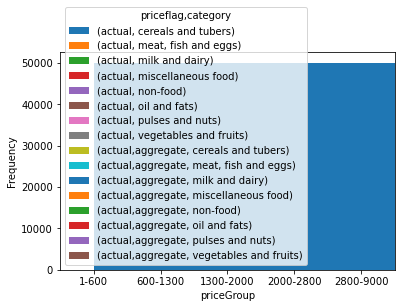

<Figure size 1440x576 with 0 Axes>

In [54]:
bycategory.unstack().plot(kind='bar',stacked=True)

plt.figure(figsize=(20,8))
byprice.unstack().plot(kind='bar',stacked=True)
byprice2 = byprice.unstack().drop("aggregate",axis = 1).unstack()# to clean it much more and plot it again

byprice2.plot(kind='bar')

data.price.plot(kind="hist")

#data.commodity.plot(kind="hist")"

plt.figure(figsize=(20,8))

<AxesSubplot:xlabel='pricetype', ylabel='category'>

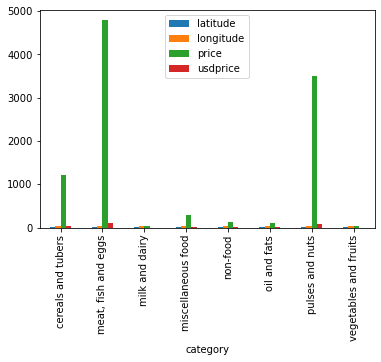

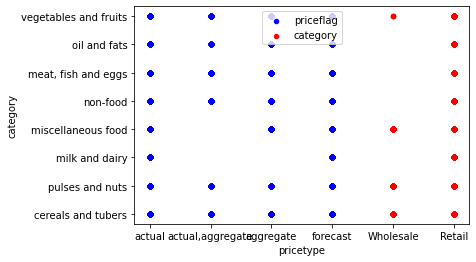

In [56]:
group=data.groupby("category")
group.mean().plot(kind="bar")

#scatter plot to see the relation items in each of the groups
ax=data.plot.scatter(x='priceflag', y='category', 
                color='Blue', label='priceflag')
data.plot.scatter(x='pricetype', y='category', color='red', 
              label='category', ax=ax)

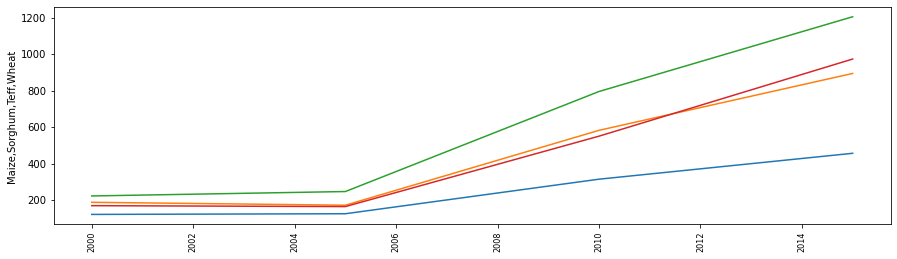

In [57]:
pivot_df = pd.DataFrame({'price':[120.75,187.25,222.0,168.75,124.50,171.25,246.25,163.75,314.00,582.00,795.00,550.00,456.0,894.00,1205.00,973.00],'commodity':['Maize(White)','Sorghum(white)','Teff','Wheat','Maize(White)','Sorghum(white)','Teff','Wheat','Maize(White)','Sorghum(white)','Teff','Wheat','Maize(White)','Sorghum(white)','Teff','Wheat'],'date':[2000,2000,2000,2000,2005,2005,2005,2005,2010,2010,2010,2010,2015,2015,2015,2015]})
df_pivot1=pivot_df.pivot(index='date',columns='commodity',values='price')
df_pivot1

data.pivot_table(index='category',columns='date')
# visualizing the pivot output
plt.figure(figsize=(15,4))
plt.plot(df_pivot1)
plt.ylabel('Maize,Sorghum,Teff,Wheat')
plt.xticks(rotation='vertical',size=8)
plt.show()

# The prediction part of machine learning

In [58]:
import datetime
data['conv_date']=pd.to_datetime(data.date,format="%Y-%M-%D")
data['conv_date'] =data['conv_date'].map(datetime.datetime.toordinal)

In [59]:
data['conv_date']

1        730134
2        730134
3        730134
4        730134
5        730134
          ...  
52224    738900
52225    738900
52226    738900
52227    738900
52228    738900
Name: conv_date, Length: 52228, dtype: int64

In [60]:
data_cat = data[["commodity"]]
data_cat.head()

,commodity
1,Maize (white)
2,Sorghum (white)
3,Teff
4,Wheat
5,Maize (white)


In [61]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
data_cat_encoded = onehot_encoder.fit_transform(data_cat)

In [62]:
data_cat_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
data_test = pd.DataFrame({"commodity":["Teff ","Wheat"]})
pd.get_dummies(data_test)

,commodity_Teff,commodity_Wheat
0,1,0
1,0,1


In [64]:
def shuffle_and_split_data(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [65]:
train_set,test_set =shuffle_and_split_data(data,0.2)
len(train_set)
np.random.seed(42)
len(test_set)

10445

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [67]:
#for the purpose of imputing
data_num = data.select_dtypes(include=[np.number])
data_num.shape
#data_num.dtypes

(52228, 5)

In [68]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [69]:
imputer.statistics_

array([9.225556e+00, 3.963330e+01, 2.038750e+02, 8.951600e+00,
       7.380170e+05])

In [70]:
#Transform the training set
X=imputer.transform(data_num)
#data_tr = pd.DataFrame(X, columns =data_num.columns,index=data_num.index)
#data_tr.head()

In [71]:
#lets drop some outliers
from sklearn.ensemble import IsolationForest
isolation_forest= IsolationForest(random_state=42)
outlier_pred= isolation_forest.fit_predict(X)
outlier_pred

array([-1, -1, -1, ...,  1,  1,  1])

In [72]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
df_num_min_max_scaled=min_max_scaler.fit_transform(data_num)
df_num_min_max_scaled

array([[ 0.00545871, -0.07114427, -0.99694304, -0.98015196, -1.        ],
       [ 0.00545871, -0.07114427, -0.99525949, -0.9692213 , -1.        ],
       [ 0.00545871, -0.07114427, -0.99437975, -0.96350937, -1.        ],
       ...,
       [ 0.66599781, -0.01584931, -1.        , -1.        ,  1.        ],
       [ 0.66599781, -0.01584931, -1.        , -1.        ,  1.        ],
       [ 0.66599781, -0.01584931, -1.        , -1.        ,  1.        ]])

In [73]:
#lets scale using zscore 
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
data_num_std_scaled=std_scaler.fit_transform(data_num)
data_num_std_scaled

array([[-0.13358015, -0.48737547, -0.41507707, -0.3353244 , -4.01817129],
       [-0.13358015, -0.48737547, -0.39825477, -0.23559485, -4.01817129],
       [-0.13358015, -0.48737547, -0.38946417, -0.18348006, -4.01817129],
       ...,
       [ 1.31996033, -0.34418063, -0.44562283, -0.51641475,  0.93539195],
       [ 1.31996033, -0.34418063, -0.44562283, -0.51641475,  0.93539195],
       [ 1.31996033, -0.34418063, -0.44562283, -0.51641475,  0.93539195]])

In [74]:
data.dtypes

admin1                object
admin2                object
category              object
commodity             object
date          datetime64[ns]
latitude             float64
longitude            float64
market                object
price                float64
priceflag             object
pricetype             object
usdprice             float64
month-year            object
priceGroup          category
year                  object
conv_date              int64
dtype: object

In [75]:
data= train_set.drop("price",axis=1)
data_labels = train_set["price"].copy()
data.shape
data.dtypes

admin1                object
admin2                object
category              object
commodity             object
date          datetime64[ns]
latitude             float64
longitude            float64
market                object
priceflag             object
pricetype             object
usdprice             float64
month-year            object
priceGroup          category
year                  object
conv_date              int64
dtype: object

In [76]:
data_labels.head()

19922    1600.0
9961       10.0
18853    1050.0
35126    4100.0
23556      40.0
Name: price, dtype: float64

In [77]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(data_labels.to_frame())
model = LinearRegression()
model.fit(data[["conv_date"]],scaled_labels)
new_data = data[["conv_date"]].iloc[:5]
scaled_predictions = model.predict(new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [78]:
predictions

array([[1979.01040023],
       [1057.59989532],
       [1953.36895826],
       [2311.92879433],
       [2055.51437463]])

In [79]:
from sklearn.compose import TransformedTargetRegressor
model  = TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(data[["conv_date"]],data_labels)
predictions = model.predict(new_data)
predictions

array([1979.01040023, 1057.59989532, 1953.36895826, 2311.92879433,
       2055.51437463])

In [80]:
#Transformation pipelines
#now let's build pipeline to preprocess the numerical attribute
from sklearn.pipeline import Pipeline
num_pipeline =Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
                       ("standardize",StandardScaler()),
                       ])

In [82]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [83]:
#since pipeline is useful to  create a series of steps that we want to execute in order
from sklearn import set_config
set_config(display='diagram')
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [84]:
data_num_prepared = num_pipeline.fit_transform(data_num)
data_num_prepared[:2].round(2)

array([[-0.13, -0.49, -0.42, -0.34, -4.02],
       [-0.13, -0.49, -0.4 , -0.24, -4.02]])

In [85]:
from sklearn.compose import ColumnTransformer
#data["latitude"]=data.latitude.astype(float)
#data["longitude"]=data.latitude.astype(float)
num_attributes =["usdprice","latitude","longitude","conv_date","date"]
cat_attributes =["admin1","admin2","market","category","commodity","priceflag","pricetype","priceGroup","month-year"]
cat_pipeline = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
    ("num",num_pipeline, num_attributes),
    ("cat",cat_pipeline, cat_attributes),
])
data.dtypes

admin1                object
admin2                object
category              object
commodity             object
date          datetime64[ns]
latitude             float64
longitude            float64
market                object
priceflag             object
pricetype             object
usdprice             float64
month-year            object
priceGroup          category
year                  object
conv_date              int64
dtype: object

In [86]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number)),
(cat_pipeline, make_column_selector(dtype_include=object)),
)

In [87]:
data_prepared = preprocessing.fit_transform(data)

In [88]:
#training and evaluating the training set
from sklearn.linear_model import LinearRegression
lin_reg =make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(data,data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DA1A3ED1F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DA1A3ED490>)])),
                ('linearregression', LinearRegression())])

In [89]:
#lets try the full preprocessing pipeline on a few training instances
data_predictions = lin_reg.predict(data)
data_predictions[:5].round(-2)

array([1500., -600.,  700., 4000., -200.])

In [90]:
#compare against the actual value
data_labels.iloc[:5].values

array([1600.,   10., 1050., 4100.,   40.])

In [91]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(data_labels,data_predictions,squared=False)
lin_rmse

594.5444736691928

In [92]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(data,data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DA1A3ED1F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DA1A3ED490>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [93]:
data_predictions = tree_reg.predict(data)
tree_rmse = mean_squared_error(data_labels,data_predictions,
                              squared=False)
tree_rmse

8.42757425349114e-17

In [94]:
#Better Evaluation Using Cross Validation to test intervally in the process by splitting the dataset in to smaller sets
#here the nine are for training and the tenth one for testing
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg,data,data_labels,
                            scoring ="neg_root_mean_squared_error",cv=10)

In [95]:
#Evaluating the system with test set
from sklearn.metrics import mean_squared_error
X_test =test_set.drop("price",axis =1)
y_test = test_set["price"].copy()
final_predictions = lin_reg.predict(X_test.reset_index(drop=True))
final_rmse = mean_squared_error(y_test, final_predictions,squared=False)
print(final_rmse)

610.7425482257173


In [96]:
#Evaluating the system with test set
from sklearn.metrics import mean_squared_error
X_test =test_set.drop("price",axis =1)
y_test = test_set["price"].copy()
final_predictions = tree_reg.predict(X_test.reset_index(drop=True))
final_rmse = mean_squared_error(y_test, final_predictions,squared=False)
print(final_rmse)

174.92289889206128


In [97]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses=-cross_val_score(forest_reg, data, data_labels,
                                                       scoring="neg_root_mean_squared_error", cv=10)

In [98]:
forest_reg.fit(data, data_labels)
data_predictions = forest_reg.predict(data)
forest_rmse = mean_squared_error(data_labels,data_predictions,
                                squared=False)
forest_rmse

47.22347655885022

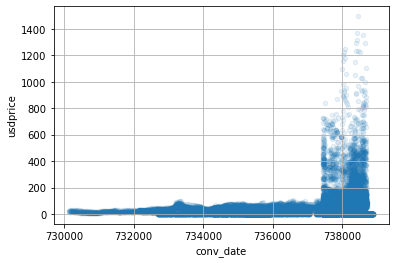

In [68]:
data.plot(kind="scatter",x="conv_date",y="usdprice",alpha=0.1,grid=True)
plt.show()